# Plot cluster map of treatment naive samples ConsensusTME gene set NES

Script related to figure s3d

### Aim:
- Plot clustermap of ConsensusTME NES as additional visualisation

In [1]:
!python --version

Python 3.6.8 :: Anaconda custom (64-bit)


## Import packages

In [4]:
import warnings
import matplotlib
import pandas as pd
import seaborn as sns
import matplotlib.cm as cm
import matplotlib.pyplot as plt

In [5]:
home = "~/git_repos/HGSOC_TME_Heterogeneity/"

## Get sample labels

### Load file


In [6]:
ls ../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt

../../Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt


In [7]:
file_keys = home + 'Data/1/TreatmentNaive_SampleLabels_WESTumourCellularity.txt'

sample_labels = pd.read_csv(file_keys,
                            sep='\t',
                            index_col='Well')

In [8]:
sample_labels.head()

,Label,Key,Case_mRNA,Site,Habitat,Case_WES,Tumour_WES,Colour,Site_marker,TumourCellularity_WES
Well,,,,,,,,,,
A01,A01_3640_5_Omentum,case10_omentum_green,10,omentum,green,10.0,5,#ff7f00,^,0.5973
A02,A02_3640_7_Omentum,case10_omentum_blue,10,omentum,blue,10.0,7,#ff7f00,^,0.5065
A03,A03_3640_9_Paracolic_Gutter,case10_paracolic_yellow,10,other,yellow,10.0,8,#ff7f00,s,0.4551
A04,A04_3640_17_R_Adnexa,case10_Radnexa_yellow,10,ovary,yellow,10.0,17,#ff7f00,o,0.6496
A05,A05_3640_18_R_Adnexa,case10_Radnexa_blue,10,ovary,blue,10.0,18,#ff7f00,o,0.6706


### Define sample colours

In [9]:
case_mrna = list(set(sample_labels['Case_mRNA']))

colours = sns.color_palette("Set1", 8).as_hex()

sample_labels['Colour'] = sample_labels['Case_mRNA'].replace(case_mrna, colours)

## Load ssGSEA results

In [10]:
ls ../../Data/3/ConsensusTME_TreatmentNaive_NES.txt

../../Data/3/ConsensusTME_TreatmentNaive_NES.txt


In [12]:
file_nes = home + '/Data/3/ConsensusTME_TreatmentNaive_NES.txt'

data_nes = pd.read_csv(file_nes, sep='\t')

data_nes.set_index('Term',
                   inplace=True)

In [13]:
data_nes.tail()

,A01,A02,A03,A04,A05,A06,A07,A08,A09,A10,...,C06,C07,C08,C09,C10,C11,C12,D01,D02,D03
Term,,,,,,,,,,,,,,,,,,,,,
Plasma_cells,0.535331,0.531357,0.438544,0.487098,0.436365,0.331769,0.349640,0.328983,0.351515,0.311369,...,0.457048,0.485839,0.320825,0.396350,0.402529,0.505763,0.512908,0.449311,0.521564,0.382782
T_cells_CD4,-0.042384,0.050694,0.004308,-0.207399,-0.165377,-0.208819,-0.255628,-0.257014,-0.333821,-0.314090,...,-0.263731,-0.148920,-0.276321,-0.170624,-0.266695,0.002644,-0.044748,-0.136003,-0.058358,-0.254172
T_cells_CD8,-0.017664,0.060364,-0.000962,-0.153047,-0.133178,-0.183371,-0.250569,-0.248262,-0.325777,-0.280394,...,-0.250714,-0.179655,-0.287451,-0.188185,-0.219502,0.002935,-0.005583,-0.084019,-0.045147,-0.269410
T_cells_gamma_delta,-0.038414,0.052337,-0.005596,-0.151517,-0.140392,-0.208642,-0.297564,-0.266138,-0.367513,-0.289465,...,-0.346152,-0.189331,-0.311887,-0.237372,-0.251334,-0.058035,-0.047690,-0.156334,-0.051404,-0.335890
T_regulatory_cells,-0.108068,0.054963,-0.088210,-0.117862,-0.184319,-0.183183,-0.213260,-0.254521,-0.324164,-0.332699,...,-0.290274,-0.119889,-0.306815,-0.224312,-0.232095,0.037718,-0.043270,-0.188168,-0.111135,-0.293895


### Define gene set colors

In [14]:
GREEN = '#007F00'
RED = '#CC0000'
GREY = '#D3D3D3'
BLUE = '#0000E5'
YELLOW = '#FFFF00'

color_sets = {
'Endothelial':                                  RED,
'B_cells':                                      '#A6CDE1',
'T_cells_CD8':                                  '#FFDD15',
'Cytotoxic_cells':                              '#FFD400',
'cytotoxic':                                    '#FFD400',
'Dendritic_cells':                              '#A181BA',
'Eosinophils':                                  '#D8AF62',
'Macrophages':                                  '#F58A21',
'Macrophages_M1':                               '#F58A21',
'Macrophages_M2':                               '#F58A21',
'Monocytes':                                    '#F58A21',
'Mast_cells':                                   '#F7F29B',
'NK_cells':                                     '#70B09D',
'Neutrophils':                                  '#B05A28',
'T_cells_gamma_delta':                          '#4F9F45',
'T_cells_CD4':                                  '#EC1C24',
'T_regulatory_cells':                           '#67B853',
'Plasma_cells':                                 '#A6CDE1',
'Fibroblasts':                                  BLUE,
'TumourCellularity_mRNA':                       'k'
}

In [15]:
color_sets_df = pd.DataFrame.from_dict(color_sets, orient='index')

In [16]:
color_sets_df.head()

,0
Endothelial,#CC0000
B_cells,#A6CDE1
T_cells_CD8,#FFDD15
Cytotoxic_cells,#FFD400
cytotoxic,#FFD400


### Map tumour cellularity info to cmap (missing tumour cellularity set to red)

In [17]:
median_tumcell = sample_labels['TumourCellularity_WES'].median()
sample_labels['TumCell_WES_bin'] = sample_labels['TumourCellularity_WES'] > median_tumcell

In [18]:
sample_labels['TumCell_WES_bin'].replace([True,False],
                                         ['k','w'],
                                         inplace=True)

In [19]:
cmp = plt.cm.binary
norm = matplotlib.colors.Normalize(vmin=sample_labels['TumourCellularity_WES'].min(),
                                   vmax=sample_labels['TumourCellularity_WES'].max(),
                                   clip=False)

mapper = cm.ScalarMappable(norm=norm,
                           cmap=cm.binary)

with warnings.catch_warnings():
    
    warnings.simplefilter("ignore")
    tumcell_vals = mapper.to_rgba(sample_labels['TumourCellularity_WES'])
    print ('NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For')

    na_ind = [i for i, x in enumerate(sample_labels['TumourCellularity_WES'].isna()) if x]

tumcell_vals[na_ind] = [0,0,0,0]

NaN Runtimewarning Due To Samples With Missing Purity Caught and Accounted For


### Plot

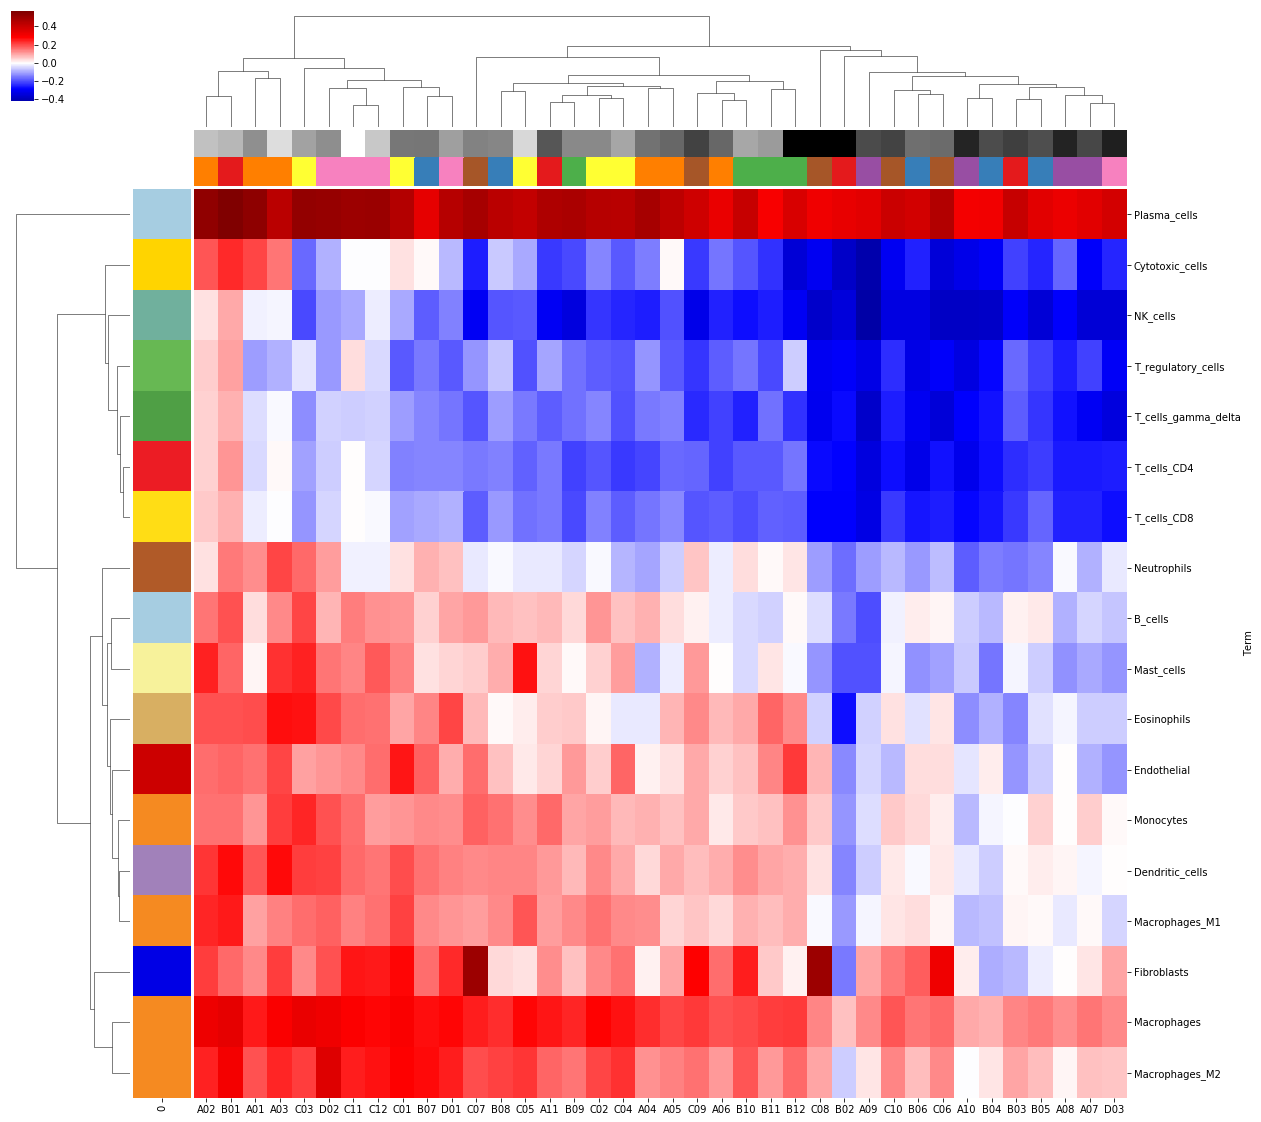

In [20]:
g = sns.clustermap(data_nes,
                   cmap='seismic',
                   center=0,
                   figsize = (20,20),
                   col_colors=[tumcell_vals,
                               sample_labels['Colour']],
                   row_colors=color_sets_df[0],
                  linewidths=0.0, rasterized=True)

### Save plot

In [21]:
FILE = "../../Figures/supplementary/3/panels/s3d_TreatmentNaive_ConsensusTME_NES_clustermap.pdf"

g.savefig(FILE, bbox='tight')

In [22]:
data_nes.shape

(18, 38)

# End script